# New features in version 0.4.0

Released in April, 2020

---

In [1]:
import veroviz as vrv
vrv.checkVersion()

'Your current installed version of veroviz is 0.4.0, the latest version available is 0.3.1. To update to the latest version, type `pip install --upgrade veroviz` at a command-line prompt.'

--- 

## New Utility Functions
Version 0.4.0 introduces 7 new "utility" functions:
1. `isochrones()`
1. `createGantt()`
1. `getElevation()`
1. `closestPointLoc2Path()`
1. `closestNode2Loc()`
1. `lengthFromNodeSeq()`
1. `calcArea()`

### 1. `isochrones()`


In [2]:
import os

In [11]:
iso = vrv.isochrones(location         = [43.00154, -78.7871],
                     rangeType        = 'distance', 
                     rangeSize        = 4000, 
                     dataProvider     = 'ors-online', 
                     dataProviderArgs = {'APIkey': os.environ['ORSKEY']})
iso

{'location': [43.00154, -78.7871],
 'boundingRegion': [[42.970807, -78.822747],
  [43.023956, -78.822747],
  [43.023956, -78.75045],
  [42.970807, -78.75045],
  [42.970807, -78.822747]],
 'isochrones': [{'value': 4000.0,
   'valueUnits': 'meters',
   'area': 22836023.55,
   'pop': 24754.0,
   'reachfactor': 0.4543,
   'poly': [[[42.990389, -78.822747],
     [42.985234, -78.820425],
     [42.982608, -78.817692],
     [42.980989, -78.815432],
     [42.979131, -78.81134],
     [42.978721, -78.810572],
     [42.971718, -78.805052],
     [42.970808, -78.799091],
     [42.970807, -78.798302],
     [42.972003, -78.796136],
     [42.973876, -78.792663],
     [42.973905, -78.783909],
     [42.973905, -78.783883],
     [42.973905, -78.783858],
     [42.973907, -78.783622],
     [42.974577, -78.782092],
     [42.975739, -78.774593],
     [42.975461, -78.771004],
     [42.976333, -78.769393],
     [42.979933, -78.769363],
     [42.984456, -78.763039],
     [42.984721, -78.760333],
     [42.986596,

In [4]:
vrv.addLeafletIsochrones(iso=iso)
# Click on the shaded area of the map for additional info

In [5]:
# Example 2
iso2 = vrv.isochrones(location         = [43.00154, -78.7871], 
                      locationType     = 'start', 
                      travelMode       = 'driving-car', 
                      rangeType        = 'time', 
                      rangeSize        = vrv.convertTime(5, 'minutes', 'seconds'), 
                      interval         = vrv.convertTime(1, 'minutes', 'seconds'), 
                      smoothing        = 5, 
                      dataProvider     ='ors-online', 
                      dataProviderArgs = {'APIkey': os.environ['ORSKEY']})

In [6]:
vrv.addLeafletIsochrones(iso=iso2)

In [7]:
myColors = ['red', 'blue', 'green']

myMap = vrv.addLeafletIcon(location=iso2['location'])

for i in range(len(iso2['isochrones'])-1, -1, -1):
    lineColor = myColors[i % len(myColors)]
    fillColor = lineColor
    for j in range(0, len(iso2['isochrones'][i]['poly'])):
        myMap = vrv.addLeafletPolygon(mapObject = myMap,
                                      points    = iso2['isochrones'][i]['poly'][j],
                                      lineColor = lineColor,
                                      fillColor = fillColor)

myMap   

### 2. `createGantt()`
- blah

In [12]:
>>> locs = [[42.8871085, -78.8731949],
...         [42.8888311, -78.8649649],
...         [42.8802158, -78.8660787],
...         [42.8845705, -78.8762794],
...         [42.8908031, -78.8770140]]

In [13]:
>>> myNodes = vrv.createNodesFromLocs(locs=locs)
>>> myNodes

,id,lat,lon,altMeters,nodeName,nodeType,popupText,leafletIconPrefix,leafletIconType,leafletColor,leafletIconText,cesiumIconType,cesiumColor,cesiumIconText
0,1,42.887108,-78.873195,0,None,None,None,glyphicon,info-sign,blue,1,pin,blue,1
1,2,42.888831,-78.864965,0,None,None,None,glyphicon,info-sign,blue,2,pin,blue,2
2,3,42.880216,-78.866079,0,None,None,None,glyphicon,info-sign,blue,3,pin,blue,3
3,4,42.884571,-78.876279,0,None,None,None,glyphicon,info-sign,blue,4,pin,blue,4
4,5,42.890803,-78.877014,0,None,None,None,glyphicon,info-sign,blue,5,pin,blue,5


In [14]:
>>> # A car will start at node 1, visit nodes 2 and 3, and then return to node 1.
>>> # A truck will follow a route from 1->5->4->1.
>>> mySolution = {
...     'car': [[1,2], [2,3], [3,1]],
...     'truck': [[1,5], [5,4], [4,1]]
>>> }
mySolution

{'car': [[1, 2], [2, 3], [3, 1]], 'truck': [[1, 5], [5, 4], [4, 1]]}

In [15]:
>>> vehicleProperties = {
...     'car':   {'model': 'veroviz/models/car_red.gltf',
...               'color': 'red'},
...     'truck': {'model': 'veroviz/models/ub_truck.gltf',
...               'color': 'blue'}
>>> }
vehicleProperties

{'car': {'model': 'veroviz/models/car_red.gltf', 'color': 'red'},
 'truck': {'model': 'veroviz/models/ub_truck.gltf', 'color': 'blue'}}

In [16]:
>>> # Build the assignments dataframe for the 2 vehicle routes.
>>> # No service times, Euclidean travel:
>>> myAssignments = vrv.initDataframe('assignments')
>>> for v in mySolution:
...     endTimeSec = 0.0
...     for arc in mySolution[v]:
...         [myAssignments, endTimeSec] = vrv.addAssignment2D(
...             initAssignments = myAssignments,
...             objectID        = v,
...             modelFile       = vehicleProperties[v]['model'],
...             startLoc        = list(myNodes[myNodes['id'] == arc[0]][['lat', 'lon']].values[0]),
...             endLoc          = list(myNodes[myNodes['id'] == arc[1]][['lat', 'lon']].values[0]),
...             startTimeSec    = endTimeSec,
...             routeType       = 'euclidean2D',
...             speedMPS        = vrv.convertSpeed(25, 'miles', 'hour', 'meters', 'second'),
...             leafletColor    = vehicleProperties[v]['color'],
...             cesiumColor     = vehicleProperties[v]['color'],
...             ganttColor      = vehicleProperties[v]['color'])
>>> myAssignments

,odID,objectID,modelFile,modelScale,modelMinPxSize,startTimeSec,startLat,startLon,startAltMeters,endTimeSec,...,leafletWeight,leafletStyle,leafletOpacity,useArrows,cesiumColor,cesiumWeight,cesiumStyle,cesiumOpacity,ganttColor,popupText
0,1,car,/veroviz/models/car_red.gltf,100,75,0.000000,42.887108,-78.873195,0,62.545331,...,3,solid,0.8,True,red,3,solid,0.8,red,None
1,2,car,/veroviz/models/car_red.gltf,100,75,62.545331,42.888831,-78.864965,0,148.568576,...,3,solid,0.8,True,red,3,solid,0.8,red,None
2,3,car,/veroviz/models/car_red.gltf,100,75,148.568576,42.880216,-78.866079,0,234.592456,...,3,solid,0.8,True,red,3,solid,0.8,red,None
3,4,truck,/veroviz/models/ub_truck.gltf,100,75,0.000000,42.887108,-78.873195,0,46.129575,...,3,solid,0.8,True,blue,3,solid,0.8,blue,None
4,5,truck,/veroviz/models/ub_truck.gltf,100,75,46.129575,42.890803,-78.877014,0,108.314642,...,3,solid,0.8,True,blue,3,solid,0.8,blue,None
5,6,truck,/veroviz/models/ub_truck.gltf,100,75,108.314642,42.884571,-78.876279,0,142.149457,...,3,solid,0.8,True,blue,3,solid,0.8,blue,None


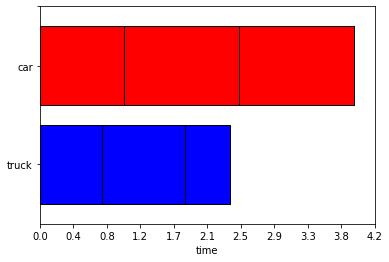

In [19]:
vrv.createGantt(assignments=myAssignments, objectIDorder = ['truck', 'car'], 
                timeFormat='m', xGridFreq=25, separateByModelFile=False)

In [ ]:
need example with all parameters

### 3. `getElevation()`
- blah

In [8]:
>>> locs = [[42.8871085, -78.8731949],
...         [42.8888311, -78.8649649],
...         [42.8802158, -78.8660787],
...         [42.8845705, -78.8762794],
...         [42.8908031, -78.8770140]]

In [9]:
vrv.getElevation(locs             = locs, 
                 dataProvider     = 'ors-online', 
                 dataProviderArgs = {'APIkey': os.environ['ORSKEY']})

[[42.887108, -78.873195, 196.0],
 [42.888831, -78.864965, 185.0],
 [42.880216, -78.866079, 183.0],
 [42.884571, -78.876279, 200.0],
 [42.890803, -78.877014, 187.0]]

In [10]:
vrv.getElevation(locs             = [[42.888, -78.864, 100]], 
                 dataProvider     = 'ors-online', 
                 dataProviderArgs = {'APIkey': os.environ['ORSKEY']})

[[42.888, -78.864, 284.0]]

### 4.  `closestPointLoc2Path()`
- Finds the point along a given line that is closest to a given location.  Returns the [lat, lon] coordinates of the point, and the corresponding distance (in [meters]) from that point to the line.

In [5]:
# Prepare some sample data
path = [[42.50, -78.65], [42.50, -78.40]]
loc1 = [42.50, -78.50]
loc2 = [42.51, -78.50]

In [6]:
# Draw the line and the 3 points on the map:
myMap = vrv.addLeafletPolyline(points = path)
myMap = vrv.addLeafletMarker(mapObject = myMap,
                             center = loc1, 
                             radius = 14,
                             text='1', fontColor='black')
myMap = vrv.addLeafletMarker(mapObject = myMap,
                             center = loc2, 
                             radius = 14,
                             text='2', fontColor='black')
myMap

In [7]:
# Example 1 - The location is on the path:
vrv.closestPointLoc2Path(loc1, path)

([42.5, -78.5], 0.0)

In [8]:
# Example 2 - The minimum distance is between points on the path:
vrv.closestPointLoc2Path(loc2, path)

([42.5, -78.50000397522506], 1103.5612443321572)

In [9]:
# Example 3 - The location and path include altitudes (which are ignored):
path2 = [[42.50, -78.40, 100],
         [42.50, -78.60, 200],
         [42.40, -78.70, 100]]
loc3  = [42.51, -78.38, 300]
#loc3  = [42.50, -78.40, 100]

[nearestPt, distMeters] = vrv.closestPointLoc2Path(loc3, path2)
nearestPt, distMeters

([42.5, -78.4, 0], 1983.9823096544242)

In [11]:
# Draw the line, the reference point, and the nearest point on the map:
myMap = vrv.addLeafletPolyline(points = path2)
myMap = vrv.addLeafletMarker(mapObject = myMap,
                             center = loc3, 
                             radius = 14,
                             text='3', fontColor='black')
myMap = vrv.addLeafletMarker(mapObject = myMap, center = nearestPt, radius = 12)
myMap

### 5.  `closestNode2Loc()`
- Returns the closest node in the dataframe to the given location.

In [22]:
# We'll prepare some sample data.

# A single location:
loc1 = [42.885, -78.861]

# A collection of locations, which we'll
# convert to a "nodes" dataframe:
locs = [[42.8871085, -78.8731949],
        [42.8888311, -78.8649649],
        [42.8802158, -78.8660787],
        [42.8845705, -78.8762794],
        [42.8908031, -78.8770140]]

myNodes = vrv.createNodesFromLocs(locs = locs, 
                                  leafletIconPrefix = "custom", 
                                  leafletIconType   = "12-white-12")
myNodes

,id,lat,lon,altMeters,nodeName,nodeType,popupText,leafletIconPrefix,leafletIconType,leafletColor,leafletIconText,cesiumIconType,cesiumColor,cesiumIconText
0,1,42.887108,-78.873195,0,None,None,None,custom,12-white-12,blue,1,pin,blue,1
1,2,42.888831,-78.864965,0,None,None,None,custom,12-white-12,blue,2,pin,blue,2
2,3,42.880216,-78.866079,0,None,None,None,custom,12-white-12,blue,3,pin,blue,3
3,4,42.884571,-78.876279,0,None,None,None,custom,12-white-12,blue,4,pin,blue,4
4,5,42.890803,-78.877014,0,None,None,None,custom,12-white-12,blue,5,pin,blue,5


In [23]:
# Now, find the closest node to the single location:
[nearestNode, distMeters] = vrv.closestNode2Loc(loc=loc1, nodes=myNodes)
nearestNode, distMeters

(2, 534.828771310757)

In [4]:
myMap = vrv.createLeaflet(nodes = myNodes)
myMap = vrv.addLeafletIcon(mapObject = myMap, location = loc1, iconColor='red')
myMap

### 6.  `lengthFromNodeSeq()`
- Calculate the total "length" (either in time or distance) along a path defined by a sequence of node IDs.

In [19]:
# Define some sample locations and create a nodes dataframe:
locs = [[42.8871085, -78.8731949],
        [42.8888311, -78.8649649],
        [42.8802158, -78.8660787],
        [42.8845705, -78.8762794],
        [42.8908031, -78.8770140]]
myNodes = vrv.createNodesFromLocs(locs=locs)

In [20]:
# Calculate time and distance matrices:
[timeSecDict, distMetersDict] = vrv.getTimeDist2D(nodes = myNodes, routeType = 'euclidean2D', speedMPS = 15)

In [21]:
# Define a sequence of nodes to visit:
nodeSeq = [1, 3, 2]

In [24]:
# Find the total travel time to visit the nodes:
totalTimeSec = vrv.lengthFromNodeSeq(nodeSeq, timeSecDict)
totalTimeSec

128.18625959871764

In [23]:
# Find the total length of the node sequence:
totalDistMeters = vrv.lengthFromNodeSeq(nodeSeq, distMetersDict)
totalDistMeters

1922.793893980765

### 7.  `calcArea()`
- Calculate the area, in square meters, of a polygon.

In [12]:
# Define a sequence of locations:
locs = [[42.82, -78.80, 0], [42.86, -78.82, 0], [42.84, -78.84, 0]]

# Calculate the area of the polygon formed by these locations:
area = vrv.calcArea(locs)
area

5449365.537915299

In [20]:
# Draw the polygon:
myNodes = vrv.createNodesFromLocs(locs)
myMap = vrv.addLeafletPolygon(points=locs, fillColor='red')
myMap = vrv.createLeaflet(mapObject=myMap, nodes=myNodes)
myMap

--- 
## New Leaflet Functions
1. `addLeafletIcon()`
2. `addLeafletIsochrones()`

### 1. `addLeafletIcon()`
- blah

In [28]:
# Define a location:
whiteHouse = [38.8977, -77.0365]

In [29]:
# A minimal example, using mostly default parameters:
vrv.addLeafletIcon(location      = whiteHouse)

In [31]:
# Example showing all function parameters:
vrv.addLeafletIcon(mapObject     = None, 
                   mapFilename   = None, 
                   mapBackground = 'arcgis aerial', 
                   mapBoundary   = None, 
                   zoomStart     = None, 
                   location      = whiteHouse, 
                   iconPrefix    = 'custom', 
                   iconType      = '18-yellow-12', 
                   iconColor     = 'purple', 
                   iconText      = 'WH', 
                   popupText     = 'click icon to see this text')

### 2. `addLeafletIsochrones()`
- blah

In [ ]:
import os

In [35]:
# Get isochrone data:
iso = vrv.isochrones(location         = [43.00154, -78.7871], 
                     locationType     = 'start', 
                     travelMode       = 'driving-car', 
                     rangeType        = 'time', 
                     rangeSize        = vrv.convertTime(5, 'minutes', 'seconds'), 
                     interval         = vrv.convertTime(2.5, 'minutes', 'seconds'), 
                     smoothing        = 5, 
                     dataProvider     ='ors-online', 
                     dataProviderArgs = {'APIkey': os.environ['ORSKEY']})

In [36]:
# A minimal working example, using mostly default values:
vrv.addLeafletIsochrones(iso = iso)

In [33]:
# An example using all of the functional parameters:
vrv.addLeafletIsochrones(mapObject          = None, 
                         mapFilename        = None, 
                         mapBackground      = 'cartodb dark_matter', 
                         mapBoundary        = None, 
                         zoomStart          = None, 
                         iso                = iso, 
                         showBoundingRegion = True, 
                         iconPrefix         = 'custom', 
                         iconType           = '12-white-12', 
                         iconColor          = 'red', 
                         iconText           = '1', 
                         popupText          = None, 
                         lineWeight         = 3, 
                         lineOpacity        = 0.8, 
                         lineStyle          = 'solid', 
                         fillOpacity        = 0.3)

---
## Updates / Changes to Existing Functions

We made several improvements to some existing VeRoViz functions.  Specifically:
- `addStaticAssignment()` now includes a parameter to specify a color for Gantt charts.
- `createLeaflet()` now includes popupText for nodes, arcs, and assignments.  There are also new node icons.
- `createCesium()` now includes popupText for nodes and routes.  There is also a new version of the Cesium viewer plugin.
- `addLeafletCircle()` and `addLeafletMarker()`:
    - Added popupText option (visible when clicking on the object)
    - Added text option (to display text in center of object)
    - Added fontSize
    - Added fontColor
- `addLeafletPolygon()` and `addLeafletPolyline()` now have a popupText option, to show information when clicking on the shape.

### `addStaticAssignment()`

### `createLeaflet()`

### `createCesium()`

### `addLeafletCircle()`

### `addLeafletMarker()`

### `addLeafletPolygon()`

### `addLeafletPolyline()`